# CS-484: Intro to ML - Assignment 4


### Author: Jorge Gonzalez Lopez
### CWID: A20474413
### Semester: Spring 2021

In [1]:
# IMPORT LIBRARIES

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import naive_bayes, svm, metrics


## Question 1

In [3]:
df = pd.read_csv('Purchase_Likelihood.csv')

In [4]:
print('\n a) \n')

print(df['insurance'].value_counts())
print(df['insurance'].value_counts(normalize = True))


 a) 

1    426067
0    143691
2     95491
Name: insurance, dtype: int64
1    0.640462
0    0.215996
2    0.143542
Name: insurance, dtype: float64


In [5]:
print('\n b) \n')
#print(df.groupby(['group_size','insurance']).size())
g_t = pd.crosstab(df['group_size'], df['insurance'])
print(g_t)


 b) 

insurance        0       1      2
group_size                       
1           115460  329552  74293
2            25728   91065  19600
3             2282    5069   1505
4              221     381     93


In [6]:
print('\n c) \n')
#print(df.groupby(['homeowner','insurance']).size())
h_t = pd.crosstab(df['homeowner'], df['insurance']) 
print(h_t)


 c) 

insurance      0       1      2
homeowner                      
0          78659  183130  46734
1          65032  242937  48757


In [7]:
print('\n d) \n')
#print(df.groupby(['homeowner','insurance']).size())
m_t = pd.crosstab(df['married_couple'], df['insurance'])
print(m_t)


 d) 

insurance            0       1      2
married_couple                       
0               117110  333272  75310
1                26581   92795  20181


In [8]:
def cramerV(ctab):
    n_ip = np.sum(np.array(ctab), axis = 1, keepdims = True)
    n_pj = np.sum(np.array(ctab), axis = 0, keepdims = True)
    n_pp = np.sum(np.array(ctab))

    E_ij = np.dot(n_ip, n_pj)/n_pp
    
    P_chi = np.sum(np.divide(np.square(np.array(ctab) - E_ij), E_ij))
    
    return np.sqrt(P_chi / (n_pp * (np.min(np.array(ctab).shape)-1)))
    

In [9]:
cram_g = cramerV(g_t)
cram_h = cramerV(h_t)
cram_m = cramerV(m_t)

In [10]:
print('\n e) \n')
print(" Feature    Cramer's V\n")
print("group_size ", cram_g)
print("homeowner ", cram_h)
print("married_couple ", cram_m)


 e) 

 Feature    Cramer's V

group_size  0.0271020140558208
homeowner  0.09708641964781958
married_couple  0.032421645835207485


In [51]:
yTrain = df['insurance']

xTrain = df[['group_size', 'homeowner', 'married_couple']]

_objNB = naive_bayes.CategoricalNB(alpha = 1.e-10)
thisModel = _objNB.fit(xTrain, yTrain)


In [48]:
list_posib = []
for i in df['group_size'].unique():
    for j in df['homeowner'].unique():
        for t in df['married_couple'].unique():
            list_posib.append([i,j,t])
list_posib.sort()
# Create all the possible combinations of the features' values
xTest = pd.DataFrame(list_posib, columns = ['group_size', 'homeowner', 'married_couple'])
# Score the xTest and append the predicted probabilities to the xTest
yTest_predProb = pd.DataFrame(_objNB.predict_proba(xTest), columns = ['P_ins0', 'P_ins1','P_ins2'])
yTest_score = pd.concat([xTest, yTest_predProb], axis = 1)

In [62]:
print('\n f) \n')
print(yTest_score)


 f) 

    group_size  homeowner  married_couple    P_ins0    P_ins1    P_ins2
0            1          0               0  0.269722  0.580133  0.150145
1            1          0               1  0.232789  0.614219  0.152992
2            1          1               0  0.194038  0.669659  0.136303
3            1          1               1  0.164935  0.698278  0.136787
4            2          0               0  0.231143  0.616518  0.152338
5            2          0               1  0.198016  0.647907  0.154078
6            2          1               0  0.163628  0.700288  0.136085
7            2          1               1  0.138274  0.725955  0.135771
8            3          0               0  0.308219  0.515924  0.175856
9            3          0               1  0.268311  0.550951  0.180738
10           3          1               0  0.226972  0.609612  0.163416
11           3          1               1  0.194370  0.640410  0.165221
12           4          0               0  0.375490  0.48

In [65]:
odds = np.array(yTest_score['P_ins1'] / yTest_score['P_ins2'])
comb = yTest_score[['group_size', 'homeowner', 'married_couple']].iloc[np.argmax(odds)]

print('\n g) \n')
print(comb)

print('\n')
print('Maximum odds value: ', np.max(max_odds))



 g) 

group_size        2
homeowner         1
married_couple    1
Name: 7, dtype: int64


Maximum odds value:  5.346912644500472


## Question 2

In [302]:
df = pd.read_csv('SpiralWithCluster.csv')

In [303]:
df

,id,x,y,SpectralCluster
0,1,1.390340,-0.018146,0
1,2,-1.136269,-1.093869,1
2,3,1.194276,0.205196,0
3,4,1.666396,0.348524,0
4,5,0.135881,-1.963015,1
...,...,...,...,...
95,96,-1.852972,2.888408,1
96,97,-1.122450,-1.340536,1
97,98,-1.393071,-0.754136,1
98,99,3.785920,-0.973841,0


In [304]:
xTrain = df[['x','y']]
yTrain = df['SpectralCluster']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape='ovr', random_state = 20210325, max_iter = -1)
thisFit = svm_Model.fit(xTrain, yTrain)

y_predictClass = thisFit.predict(xTrain)

#df['_PredictedClass_'] = y_predictClass
#svm_Mean = df.groupby('_PredictedClass_').mean()

# get the separating hyperplane
w = thisFit.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-4, 4)
yy = a * xx - (thisFit.intercept_[0]) / w[1]

print('The intercept w0 is: ', thisFit.intercept_)
print('The coeficients are: ', thisFit.coef_)
print('The equation is: ', np.round(thisFit.intercept_[0],decimals=7), ' + ', np.round(w[0],decimals=7), 'x + ', np.round(w[1],decimals=7), 'y = 0')

The intercept w0 is:  [0.003345]
The coeficients are:  [[0.05333512 0.32868383]]
The equation is:  0.003345  +  0.0533351 x +  0.3286838 y = 0


In [305]:
print('Misclassification Rate = ', 1 - metrics.accuracy_score(yTrain, y_predictClass))

Misclassification Rate =  0.5


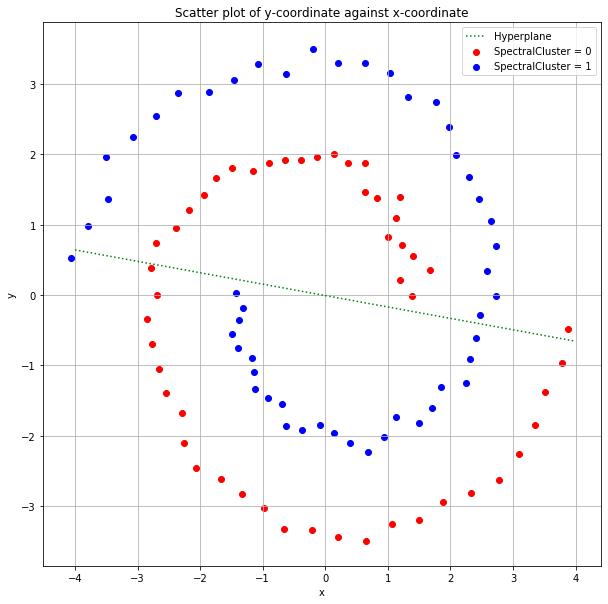

In [306]:
plt.figure(figsize=(10,10))

plt.scatter(df[df['SpectralCluster']==0]['x'],df[df['SpectralCluster']==0]['y'], c = 'r')
plt.scatter(df[df['SpectralCluster']==1]['x'],df[df['SpectralCluster']==1]['y'], c = 'b')

plt.plot(xx, yy, 'g:')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y-coordinate against x-coordinate')
plt.legend([ 'Hyperplane','SpectralCluster = 0', 'SpectralCluster = 1'])
plt.grid(True)

In [307]:
df['r'] = np.sqrt(df['x']**2 +  df['y']**2)
df['theta'] = np.arctan2(df['y'], df['x'])

In [308]:
df['theta'] = df['theta'].apply(lambda x: 2.0*np.pi + x if x < 0.0 else x)

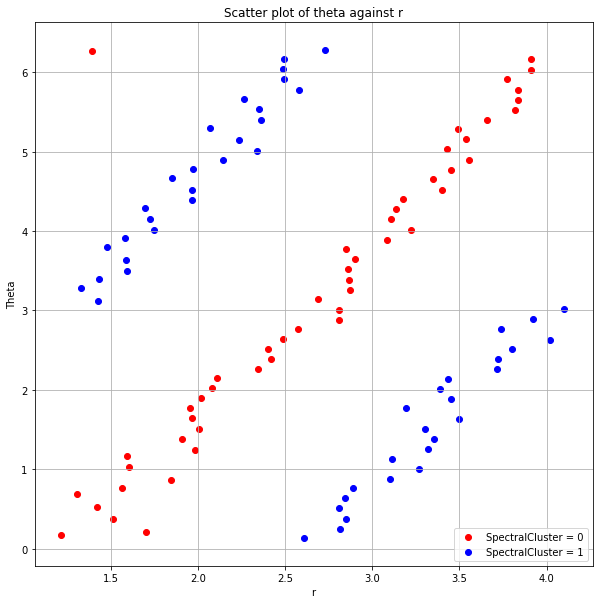

In [309]:
plt.figure(figsize=(10,10))
plt.scatter(df[df['SpectralCluster']==0]['r'],df[df['SpectralCluster']==0]['theta'], c = 'r')
plt.scatter(df[df['SpectralCluster']==1]['r'],df[df['SpectralCluster']==1]['theta'], c = 'b')

plt.xlabel('r')
plt.ylabel('Theta')
plt.title('Scatter plot of theta against r')
plt.legend(['SpectralCluster = 0', 'SpectralCluster = 1'])
plt.grid(True)

In [310]:
df['Group'] = df['SpectralCluster']

In [311]:
for i in range(len(df['Group'])):
    r = df['r'].iloc[i]
    theta = df['theta'].iloc[i]
    clas = df['SpectralCluster'].iloc[i]
    if r < 2 and theta > 6:
        df.at[i, 'Group'] = 0
    elif r < 3 and theta > 3 and clas == 1:
        df.at[i, 'Group'] = 1
    elif clas == 0:
        df.at[i, 'Group'] = 2
    else:
        df.at[i, 'Group'] = 3     

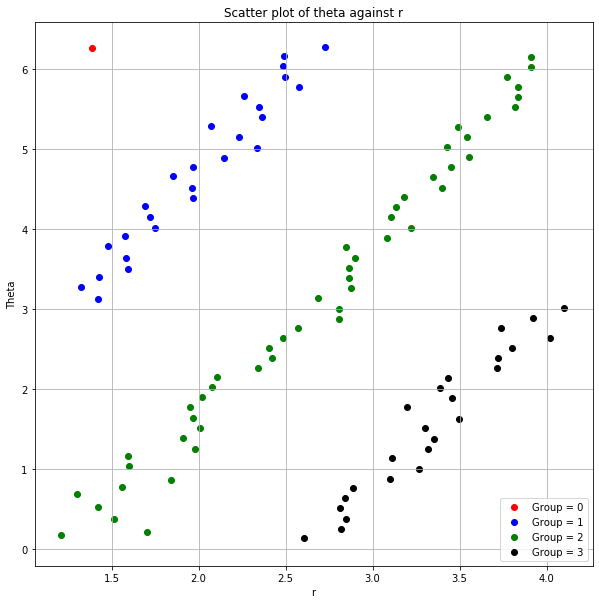

In [312]:
plt.figure(figsize=(10,10))
plt.scatter(df[df['Group']==0]['r'],df[df['Group']==0]['theta'], c = 'r')
plt.scatter(df[df['Group']==1]['r'],df[df['Group']==1]['theta'], c = 'b')
plt.scatter(df[df['Group']==2]['r'],df[df['Group']==2]['theta'], c = 'g')
plt.scatter(df[df['Group']==3]['r'],df[df['Group']==3]['theta'], c = 'k')


plt.xlabel('r')
plt.ylabel('Theta')
plt.title('Scatter plot of theta against r')
plt.legend(['Group = 0', 'Group = 1','Group = 2','Group = 3'])
plt.grid(True)

In [313]:
hyperplanes = []
for i in range(3):
    print('SVM', i)
    xTrain = df[['r','theta']].loc[(df['Group']==i) | (df['Group']== i+1)]
    yTrain = df['SpectralCluster'].loc[(df['Group']==i) | (df['Group']== i+1)]

    svm_Model = svm.SVC(kernel = 'linear', decision_function_shape='ovr', random_state = 20210325, max_iter = -1)
    thisFit = svm_Model.fit(xTrain, yTrain)

    y_predictClass = thisFit.predict(xTrain)

    # get the separating hyperplane
    w = thisFit.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(1, 4.5)
    yy = a * xx - (thisFit.intercept_[0]) / w[1]
    
    hyperplanes.append([xx,yy])
    
    print('The intercept w0 is: ', thisFit.intercept_)
    print('The coeficients are: ', thisFit.coef_)
    print('The equation is: ', np.round(thisFit.intercept_[0],decimals=7), ' + ', np.round(w[0],decimals=7), 'r + ', np.round(w[1],decimals=7), 'theta = 0')

SVM 0
The intercept w0 is:  [1.46912508]
The coeficients are:  [[ 0.93378415 -0.45380249]]
The equation is:  1.4691251  +  0.9337841 r +  -0.4538025 theta = 0
SVM 1
The intercept w0 is:  [0.88406321]
The coeficients are:  [[-1.88674959  0.8914745 ]]
The equation is:  0.8840632  +  -1.8867496 r +  0.8914745 theta = 0
SVM 2
The intercept w0 is:  [-4.13284488]
The coeficients are:  [[ 2.01258355 -0.83756164]]
The equation is:  -4.1328449  +  2.0125835 r +  -0.8375616 theta = 0


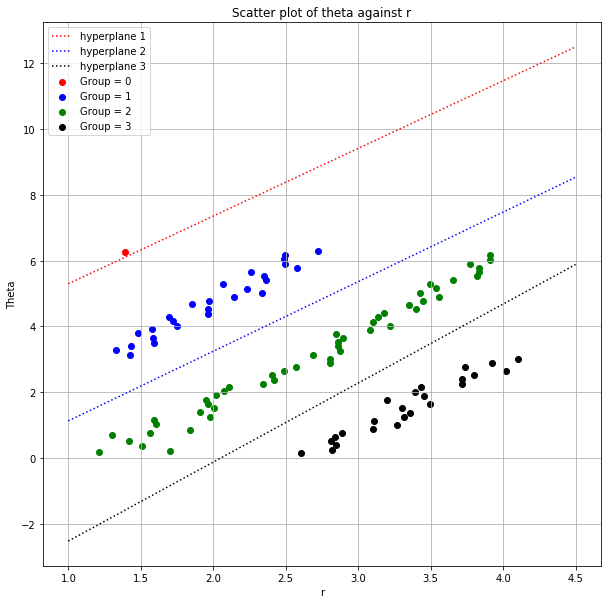

In [314]:
plt.figure(figsize=(10,10))
plt.scatter(df[df['Group']==0]['r'],df[df['Group']==0]['theta'], c = 'r')
plt.scatter(df[df['Group']==1]['r'],df[df['Group']==1]['theta'], c = 'b')
plt.scatter(df[df['Group']==2]['r'],df[df['Group']==2]['theta'], c = 'g')
plt.scatter(df[df['Group']==3]['r'],df[df['Group']==3]['theta'], c = 'k')

plt.plot(hyperplanes[0][0], hyperplanes[0][1], 'r:')
plt.plot(hyperplanes[1][0], hyperplanes[1][1], 'b:')
plt.plot(hyperplanes[2][0], hyperplanes[2][1], 'k:')

plt.xlabel('r')
plt.ylabel('Theta')
plt.title('Scatter plot of theta against r')
plt.legend(['hyperplane 1','hyperplane 2','hyperplane 3', 'Group = 0', 'Group = 1','Group = 2','Group = 3'])
plt.grid(True)

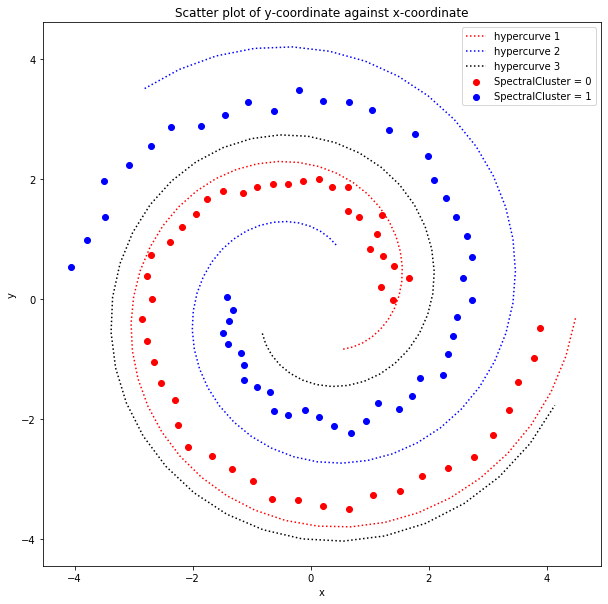

In [315]:
plt.figure(figsize=(10,10))

plt.scatter(df[df['SpectralCluster']==0]['x'],df[df['SpectralCluster']==0]['y'], c = 'r')
plt.scatter(df[df['SpectralCluster']==1]['x'],df[df['SpectralCluster']==1]['y'], c = 'b')

h0_xx = hyperplanes[0][0] * np.cos(hyperplanes[0][1])
h0_yy = hyperplanes[0][0] * np.sin(hyperplanes[0][1])

h1_xx = hyperplanes[1][0] * np.cos(hyperplanes[1][1])
h1_yy = hyperplanes[1][0] * np.sin(hyperplanes[1][1])

h2_xx = hyperplanes[2][0] * np.cos(hyperplanes[2][1])
h2_yy = hyperplanes[2][0] * np.sin(hyperplanes[2][1])

plt.plot(h0_xx, h0_yy, 'r:')
plt.plot(h1_xx, h1_yy, 'b:')
plt.plot(h2_xx, h2_yy, 'k:')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y-coordinate against x-coordinate')
plt.legend(['hypercurve 1','hypercurve 2','hypercurve 3', 'SpectralCluster = 0', 'SpectralCluster = 1'])
